In [1]:
import numpy as np
import random as nr
import copy
#for K-means
from sklearn.cluster import KMeans
from pandas import DataFrame
#for diagram
import matplotlib.pyplot as plt

In [2]:
with open('sample dataset.txt','r') as reader:
    #open file and get data in a list and final close
    data_list = reader.readlines()

node_number = int(data_list[0])

#create adjacency list 
adj_list = [[] for i in range(node_number)]

#fill list with data
for i in range(1,len(data_list)):

    this = data_list[i].split(" ")
    row = int(this[0])-1
    col = int(this[1])-1     
    adj_list[row].append(col)
    adj_list[col].append(row)

edge_number = len(data_list)-1

In [3]:
def generate_chromosome(adj_list):
    this = []
    for i in range(node_number):
        if len(adj_list[i])!=1:
            select_random = nr.randint(0,len(adj_list[i])-1)
            this.append([adj_list[i][select_random]])
            del(select_random)
        else:
            this.append([adj_list[i][0]])
    return this

def get_community(chromosome):

    class Graph:

        def __init__(self, V):
            self.V = V
            self.adj = [[] for i in range(V)]

        def DFSUtil(self, temp, v, visited):

            visited[v] = True

            temp.append(v)

            for i in self.adj[v]:
                if visited[i] == False:

                    temp = self.DFSUtil(temp, i, visited)
            return temp

        def addEdge(self, v, w):
            self.adj[v].append(w)
            self.adj[w].append(v)

        def connectedComponents(self):
            visited = []
            cc = []
            for i in range(self.V):
                visited.append(False)
            for v in range(self.V):
                if visited[v] == False:
                    temp = []
                    cc.append(self.DFSUtil(temp, v, visited))
            return cc

    g = Graph(node_number)
    for i in range(len(chromosome)):
        g.addEdge(i,chromosome[i][0])
    cc = g.connectedComponents()

    this_community = [0 for i in range(node_number)]
    for i in range(len(cc)):
        for j in cc[i]:
            this_community[j] = i+1
    return this_community

#create random chromosome
#get community for random
#this_cuckoo
def create_cuckoo():
   

    this = generate_chromosome(adj_list)
    habitat = get_community(this)
    return habitat,this



In [4]:
matrix = [[0 for i in range(node_number)] for i in range(node_number)]
for i in range(node_number):
    for j in range(len(adj_list[i])):
        b = adj_list[i][j]
        matrix[i][b] = 1
    
#list number of community coromosom
def fitness(list):
    
    sumation = 0
    m = edge_number
    for i in range(node_number):
        ki = sum(matrix[i])
        for j in range(node_number):
            if matrix[i][j]==1:
                A = 1
            else:
                A = 0
            kj = sum(matrix[j])

            delta = 0
            if list[i] == list[j]:delta = 1
            sumation = sumation + ((A)-((ki*kj)/(2*m)))*(delta)


    return(sumation/(2*edge_number))

In [5]:
def generator(cuckoo_number):
    habitat_matrix = [[] for i in range(cuckoo_number)]
    id_matrix = [[] for i in range(cuckoo_number)]
    this_fitness = [[] for i in range(cuckoo_number)]

    for i in range(cuckoo_number):
        this_habitat,this_id = create_cuckoo()
        habitat_matrix[i] = this_habitat
        id_matrix[i] = this_id
        this_fitness[i] = fitness(this_habitat)
    return habitat_matrix,id_matrix,this_fitness

In [6]:
def ELR(eggs_number):
    this_ELR = [0 for i in range(cuckoo_number)]
    this_sum = sum(eggs_number)
    for i in range(cuckoo_number):
        this_ELR[i] = round(alpha * ((eggs_number[i])/(this_sum)) * (max_var - min_var))
    return this_ELR

def create_eggs():
    eggs = []
    for i in range(cuckoo_number):
        eggs.append(nr.randint(min_eggs,max_eggs))
    return eggs

In [7]:
# fitness_eggs = [0 for i in range(sumation)]
def expand(eggs,elr,cuckoo):

    for i in range(eggs):
        egg = copy.deepcopy(cuckoo)
        for j in range(len(cuckoo)):
            yes_no = nr.randint(0,1)
            right_left = nr.randint(0,1)
            tolerance = nr.randint(1,elr)
            if yes_no == 1:
                
                if len(adj_list[j]) == 1:
                    continue
                
                #move
                if right_left == 1:
                    #go right with elr size
                    this = adj_list[j].index(cuckoo[j][0]) + tolerance
                
                if right_left == 0:
                    #go left with elr size
                    this = adj_list[j].index(cuckoo[j][0]) - tolerance
                
                if this>=len(adj_list[j]):
                    this = this - len(adj_list[j])
                elif this<0:
                    this = len(adj_list[j]) + this

                egg[j] = [adj_list[j][this]]
                

        id_matrix.append(egg)
        new_habitant = get_community(egg)
        habitat_matrix.append(new_habitant)
        this_fitness.append(fitness(new_habitant))

In [8]:
def K_Means(num):
    K = num
    Data = {}
    for i in range(len(id_matrix[0])):
        Data[f'{i+1}'] = []

    for i in id_matrix:
        for j in range(len(i)):
            Data[f'{j+1}'].append(i[j][0])

    df = DataFrame(Data,columns=[f'{i+1}' for i in range(len(id_matrix[0]))])

    kmeans = KMeans(n_clusters = K).fit(df)
    cent = kmeans.cluster_centers_

    labels = kmeans.labels_
    return labels,cent

In [9]:
#choose the best community
def target(labels):
    for i in range(len(labels)):
        #Maximum cluster is 5!
        if labels[i]==0:
            fit_mean[0].append(this_fitness[i])
            id_mean[0].append(id_matrix[i])
            habitat_mean[0].append(habitat_matrix[i])
        if labels[i]==1:
            fit_mean[1].append(this_fitness[i])
            id_mean[1].append(id_matrix[i])
            habitat_mean[1].append(habitat_matrix[i])
        if labels[i]==2:
            fit_mean[2].append(this_fitness[i])
            id_mean[2].append(id_matrix[i])
            habitat_mean[2].append(habitat_matrix[i])
        if labels[i]==3:
            fit_mean[3].append(this_fitness[i])
            id_mean[3].append(id_matrix[i])
            habitat_mean[3].append(habitat_matrix[i])
        if labels[i]==4:
            fit_mean[4].append(this_fitness[i])
            id_mean[4].append(id_matrix[i])
            habitat_mean[4].append(habitat_matrix[i])

    median = []
    for i in range(K):
        if len(fit_mean[i])==0:
            return "converge"
        median.append(sum(fit_mean[i])/len(fit_mean[i]))

    target_zone = median.index(max(median))
    return target_zone

In [10]:
#set goal in selective community
def get_goal(choosen):
    goal = list(cent[choosen])
    for i in range(len(goal)):
        minimum = 1000
        for j in adj_list[i]:
            if abs(goal[i]-j)<minimum:
                minimum = abs(goal[i]-j) 
                tmp = j
        goal[i] = [tmp]
    return goal

In [11]:
def migrate(community,target,fit,habitat):
    
    for j in range(len(community)):
        landa = nr.randint(1,len(community[j]))
        indexes = []
        for i in range(landa):
            indexes.append(nr.randint(0,len(community[j])-1))    
        for i in range(landa):
            community[j][indexes[i]] = target[indexes[i]]
        
        this_habitat = get_community(community[j])
        habitat[j] = this_habitat
        fit[j] = fitness(this_habitat)

In [12]:
cuckoo_number = 10
max_iteration = 30

#random eggs for each habitat
min_eggs = 6
max_eggs = 10
#ELR = Egg Laying Radius
min_var = 1
max_var = 6
alpha = 2
p = 0.3

K = 3

Nmax = 200

In [29]:
#main script
habitat_matrix,id_matrix,this_fitness = generator(cuckoo_number)
top_habitat,top_fitness = [],[]
for i in range(max_iteration):
    
    #tarif nahie tokhmgozari
    #takhsis tokhm
    this_eggs = create_eggs()
    zone = ELR(this_eggs)
    sumation = sum(this_eggs)
    
    #tokhm gozari
    fitness_eggs = [0 for i in range(sumation)]
    for i in range(cuckoo_number):
        expand(this_eggs[i],zone[i],id_matrix[i])
    
    #sort
    final = sorted(zip(this_fitness,id_matrix,habitat_matrix), reverse=True)
    this_fitness,id_matrix,habitat_matrix = map(list, zip(*final))
    
    #cut eggs with law fitness with Pi percent
    #pi%
    cut = round((1-p)*len(this_fitness))
    this_fitness = this_fitness[0:cut]
    id_matrix = id_matrix[0:cut]
    habitat_matrix = habitat_matrix[0:cut]
    
    #cluster wiht KMeans for all cuckoos to prepare migration
    labels,cent = K_Means(K)
    
    #choose best place
    fit_mean = [[] for i in range(K)]
    id_mean = [[] for i in range(K)]
    habitat_mean = [[] for i in range(K)]
    
    #target_zone is that cluster choose with highest average fitness
    target_zone = target(labels)
    if target_zone == "converge":
        flag = 1
        break
    
    #goal is central habitat in best cluster
    goal = get_goal(target_zone)
    
    #migration all cluster to best cluster with landa parameter
    for i in range(K):
        #migrate for each another zone to target zone
        if i != target_zone:
            migrate(id_mean[i],goal,fit_mean[i],habitat_mean[i])
    
    #prepare to next iteration and union clusters
    habitat_matrix = []
    id_matrix = []
    this_fitness = []
    for i in range(K):
        for j in range(len(habitat_mean)):
            for k in range(len(habitat_mean[j])):
                habitat_matrix.append(habitat_mean[j][k])
                id_matrix.append(id_mean[j][k])
                this_fitness.append(fit_mean[j][k])
    
    #get the best
    #point to best
    pointer = this_fitness.index(max(this_fitness))
    top_fitness.append(this_fitness[pointer])
    top_habitat.append(habitat_matrix[pointer])
    

    #removing from nature
    pop = len(this_fitness)
    diff = pop - Nmax
    if diff>0:
        for i in range(diff):
            random = nr.randint(0,len(this_fitness)-1)
            habitat_matrix.pop(random)
            id_matrix.pop(random)
            this_fitness.pop(random)
    
    for i in range(1,10):
        print("Running","."*(10-i))             
    for i in range(1,10):
        print("Running","."*i)
  

In [30]:
result = max(top_fitness)
print("fitness is: ",result)
index = top_fitness.index(result)
print("community detected: ")
print(top_habitat[index])
final = top_habitat[index]

fitness is:  0.41978961209730375
community detected: 
[1, 1, 1, 1, 2, 2, 2, 1, 3, 3, 2, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3]


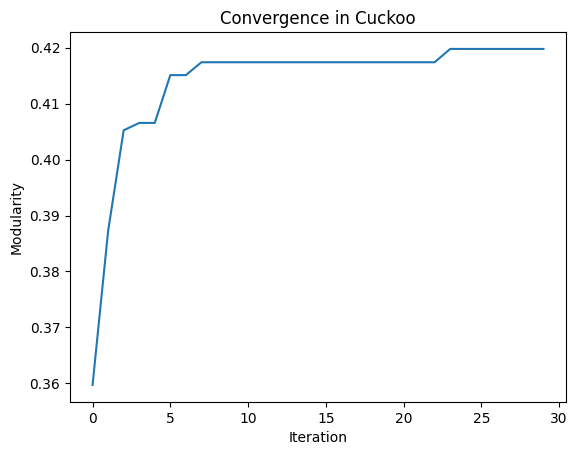

In [31]:
maximum = -1
for i in range(len(top_fitness)):
    if top_fitness[i] > maximum:
        maximum = top_fitness[i]
    else:
        top_fitness[i] = maximum
plt.plot(top_fitness)
plt.ylabel('Modularity')
plt.xlabel('Iteration')
plt.title('Convergence in Cuckoo')
plt.show()